In [1]:
# notebook to illustrate extracting topics using SVD

In [2]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [3]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [4]:
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/simple_test/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/shakespeare_macbeth/txt/", text_filename_pattern="macbeth_act_0?_scene_0?.txt")
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/mixed/txt/", text_filename_pattern="*.txt")

content_directory =  data_sets/mixed/txt/
text_filename_pattern =  *.txt
self.documents populated =  52


In [5]:
# first clear index
tmt.index_wordcount.delete_index(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    #print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_only_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)
    
    # build n-grams
    #gl = tmt.word_processing.build_ngrams_from_words(dl,2)

    # remove stop words
    el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # update index
    tmt.index_wordcount.create_wordcount_index_for_document(cr.content_directory, document_name, el)
    pass

removed wordcount index file:  data_sets/mixed/txt/index_wordcount.hdf5


In [6]:
# merge document indices into a corpus index
tmt.index_wordcount.merge_wordcount_indices_for_corpus(cr.content_directory)

saving corpus word count index ...  data_sets/mixed/txt/index_wordcount.hdf5


In [7]:
# delete and build relevance index
tmt.index_relevance.delete_index(cr.content_directory)
tmt.index_relevance.calculate_relevance_index(cr.content_directory)

removed relevance index file:  data_sets/mixed/txt/index_relevance.hdf5
saving corpus relevance index ...  data_sets/mixed/txt/index_relevance.hdf5


In [8]:
# delete and rebuild SVD of doc-term matrix
tmt.svd.delete_svd(cr.content_directory)
tmt.svd.calculate_singular_value_decomposition(cr.content_directory)

removed svd:  data_sets/mixed/txt/svd.hdf5
saving singular value decomposition ...  data_sets/mixed/txt/svd.hdf5


In [9]:
# get SVD eigenvalues
eigenvalues = tmt.svd.get_svd_eigenvalues(cr.content_directory)

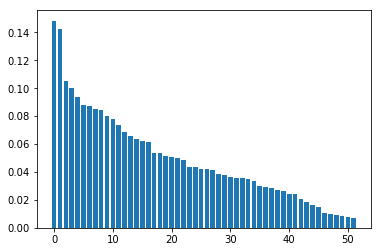

In [10]:
# visualise the SVD eigenvalues as a barchart to see most significant
tmt.visualisation.plot_bar_chart(eigenvalues)

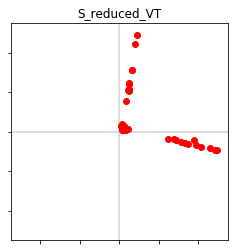

In [11]:
# get document-view projection onto 2 dimensions
document_view = tmt.svd.get_document_view(cr.content_directory)

# plot documents in reduced dimension space with a 2-d scatter 
tmt.visualisation.plot_scatter_chart(document_view)

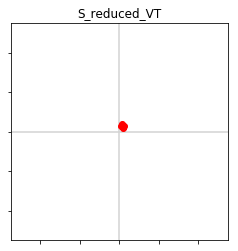

In [12]:
#tmt.visualisation.plot_scatter_chart(document_view.iloc[:,0:13])
#tmt.visualisation.plot_scatter_chart(document_view.iloc[:,13:26])
#tmt.visualisation.plot_scatter_chart(document_view.iloc[:,26:39])
tmt.visualisation.plot_scatter_chart(document_view.iloc[:,39:52])

In [70]:
# get top n topics, n is usually the same as key dimensions identified by the eigenvalue bar chart above
number_of_topics = 4
# how many words in each topic (the most significant)
topic_length = 10

topics_list = tmt.svd.get_topics(cr.content_directory, number_of_topics, topic_length)

In [71]:
for i, topic in enumerate(topics_list):
    print(" topic #", i)
    print(topic, "\n")
    pass

 topic # 0
sauce       0.036254
butter      0.031721
broth       0.029299
boiled      0.028786
flour       0.028568
little      0.027809
water       0.027283
rice        0.025682
quantity    0.024787
salt        0.018478
Name: 0, dtype: float64 

 topic # 1
subject         0.042459
benghazi        0.033981
state           0.032291
f201504841      0.032254
redactions      0.031469
unclassified    0.031251
sensitive       0.028776
waiver          0.027892
05132015        0.027635
department      0.025765
Name: 1, dtype: float64 

 topic # 2
vegetables    0.036591
sauce         0.030400
rice          0.023624
soup          0.022900
fish          0.019670
cabbage       0.017470
boiled        0.016740
greens        0.015799
flour         0.015604
cooking       0.014433
Name: 2, dtype: float64 

 topic # 3
rice          0.041190
vegetables    0.037766
saffron       0.018390
cabbage       0.017364
marrow        0.017055
greens        0.016380
cooked        0.012974
beef          0.012837
soup

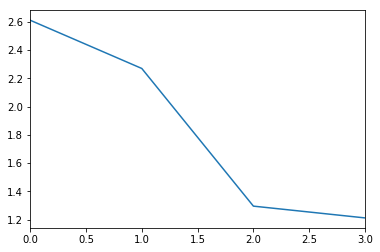

In [72]:
x = tmt.svd.get_word_view(cr.content_directory,4)
x.abs().sum().plot()